In [21]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train.shape

(7352, 563)

In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [9]:
train.isnull().sum().head()

tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
tBodyAcc-std()-X     0
tBodyAcc-std()-Y     0
dtype: int64

In [ ]:
#no null values

In [10]:
#label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
test.head()

In [13]:
labels=le.fit_transform(train["Activity"])

In [19]:
train["Activity"].unique()     #len = 6

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

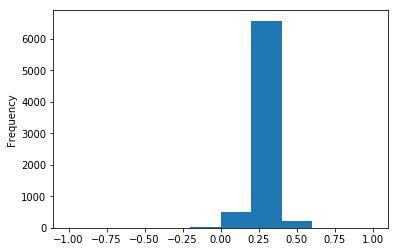

In [22]:
train["tBodyAcc-mean()-X"].plot(kind="hist")

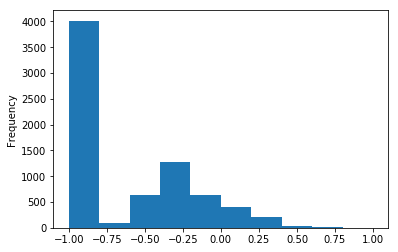

In [24]:
train["tBodyAcc-mad()-X"].plot(kind="hist") # not normal distribution

In [25]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [26]:
train1=train.drop(labels="subject",axis=1)

In [27]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [30]:
#80:20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train1.iloc[:,0:561], labels, test_size=0.2, random_state=0)

In [31]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2591,0.278823,-0.016778,-0.106672,-0.997872,-0.987000,-0.981934,-0.998046,-0.987720,-0.982145,-0.943769,...,0.575803,-0.721693,-0.897463,-0.305386,-0.380093,0.058118,0.923454,-0.931404,0.062039,-0.019127
6002,0.314546,0.003091,-0.079625,-0.443819,-0.150654,-0.291282,-0.456789,-0.181451,-0.304442,-0.257059,...,-0.073631,-0.244754,-0.636082,-0.236787,-0.255432,-0.558631,0.066144,-0.871556,0.185138,0.036665
5381,0.283803,-0.004345,-0.099339,-0.597485,-0.053657,-0.427524,-0.617588,-0.054933,-0.430891,-0.547508,...,-0.130754,0.336614,0.092898,-0.051579,-0.025325,-0.895856,0.435597,-0.861025,0.180881,-0.033288
4338,0.271792,-0.011229,-0.090045,0.147879,0.243548,-0.031222,0.108900,0.217397,-0.104161,0.354371,...,0.603435,-0.788602,-0.940788,0.303362,-0.822421,0.962575,0.509678,-0.631202,0.324283,0.135895
6597,0.238337,-0.039950,-0.158257,0.283615,0.226575,-0.133216,0.244607,0.213950,-0.168971,0.623434,...,0.302150,-0.189878,-0.585136,0.095017,-0.683623,0.936870,-0.635852,-0.749472,0.235484,0.126574


In [32]:
DTClassifier= DecisionTreeClassifier (max_depth=22, min_samples_split =3,criterion='gini',min_samples_leaf=3)
DTClassifier.fit(X_train,y_train)
predicted_labels = DTClassifier.predict(X_test)
DTClassifier.score(X_test, y_test)

0.9347382732834806

In [33]:
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [35]:
test_labels=le.transform(test["Activity"])

In [39]:
test1=test.drop(["subject","Activity"],1)

In [41]:
test1.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [42]:
DTClassifier= DecisionTreeClassifier (max_depth=22, min_samples_split =3,criterion='gini',min_samples_leaf=3)
DTClassifier.fit(train1.iloc[:,0:561],labels)
predicted_labels = DTClassifier.predict(test1)

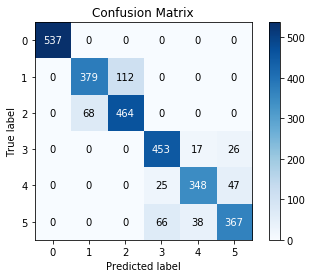

In [43]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_labels,predicted_labels, normalize=False)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
print(classification_report(test_labels,predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.85      0.77      0.81       491
           2       0.81      0.87      0.84       532
           3       0.83      0.91      0.87       496
           4       0.86      0.83      0.85       420
           5       0.83      0.78      0.81       471

   micro avg       0.86      0.86      0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.87      0.86      0.86      2947



In [46]:
metrics.accuracy_score(test_labels,predicted_labels)

0.8646080760095012

In [52]:
## random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, make_scorer
from tqdm import tqdm
SEED = 1
model_full_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=SEED, n_jobs=-1)
model_full_rf.fit(train1.iloc[:,0:561],labels)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [53]:
predicted_labels_rf =model_full_rf.predict(test1)

In [54]:
metrics.accuracy_score(test_labels,predicted_labels_rf)

0.9263657957244655

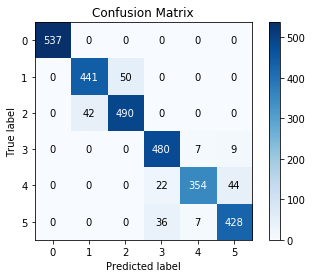

In [55]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_labels,predicted_labels_rf, normalize=False)
plt.show()

In [56]:
print(classification_report(test_labels,predicted_labels_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.91      0.90      0.91       491
           2       0.91      0.92      0.91       532
           3       0.89      0.97      0.93       496
           4       0.96      0.84      0.90       420
           5       0.89      0.91      0.90       471

   micro avg       0.93      0.93      0.93      2947
   macro avg       0.93      0.92      0.92      2947
weighted avg       0.93      0.93      0.93      2947

